In [1]:
# libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.model_selection import train_test_split # for train-test split
from sklearn.preprocessing import OneHotEncoder, StandardScaler # for categorical encoding
from sklearn.compose import ColumnTransformer # for combining transformations
from sklearn.pipeline import Pipeline # for creating a pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # for evaluation metrics
from sklearn.metrics import roc_auc_score, roc_curve # for ROC curve and AUC
import matplotlib.pyplot as plt # for plotting
from sklearn.model_selection import cross_val_predict # for cross-validation predictions
from sklearn.linear_model import LogisticRegressionCV # for cross-validated logistic regression
from sklearn.model_selection import StratifiedKFold # for stratified fold cross-validation
from sklearn.base import clone # for cloning models
from sklearn.model_selection import RepeatedStratifiedKFold # for repeated stratified fold cross-validation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import joblib








In [2]:
# Load data
master_df = pd.read_csv('C:\\Users\\Hassan\\Documents\\Projects\\baard\\baard_master_sheet.csv')


# make variable had_fall if total_number_falls > 0
master_df['had_fall'] = (master_df['total_number_falls'] > 0).astype(int)

# add new varaible BMI_extremer, where 1 = bmi > 40 or < 20, binary variables
master_df['BMI_extreme'] = ((master_df['bmi'] > 40) | (master_df['bmi'] < 20)).astype(int)

 
ON_both = master_df[master_df['medication_group'].isin(["ARIPIPRAZOLE", "BUPROPION"])]

ON_arp = master_df[master_df['medication_group'] == "ARIPIPRAZOLE"]

ON_bup = master_df[master_df['medication_group'] == "BUPROPION"]


## prepare the data for modeling -- demographic variables + clin + cog

## new clin demo variables = age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',
                ## add to models and see difference

ON_bup_cog = ON_bup.dropna(subset=['MTOTALIS_01'])
ON_bup_cog = ON_bup_cog[~ON_bup_cog['record_id'].str.startswith('CU')]
#select the demographic columns and cog columns
ON_bup_cog = ON_bup_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']].dropna()
ON_arp_cog = ON_arp.dropna(subset=['MTOTALIS_01'])
ON_arp_cog = ON_arp_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']].dropna()

ON_arp_cog = ON_arp_cog[~ON_arp_cog['record_id'].str.startswith('CU')]

## prepare the data for modeling -- demographic variables + clin + nih cog

ON_bup_nih =ON_bup.dropna(subset=['fcc_baseline'])
ON_bup_nih = ON_bup_nih[~ON_bup_nih['record_id'].str.startswith('CU')]
ON_bup_nih = ON_bup_nih[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']].dropna()



ON_arp_nih =ON_arp.dropna(subset=['fcc_baseline'])
ON_arp_nih = ON_arp_nih[~ON_arp_nih['record_id'].str.startswith('CU')]
ON_arp_nih = ON_arp_nih[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'fcc_baseline',	'dccs_baseline',	'flanker_baseline',	'listSort_baseline',	'pattComp_baseline'	,'psm_baseline']]

#select the demographic columns and cog columns
ON_arp_cog = ON_arp_cog[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme', 'AIS_01',	'MDMIS_01',	'LIS_01',	'MVCIS_01',	'IMIS_01',	'MTOTALIS_01','CWI3CSSFinal_01','DERRSS4_01','CWI4CSSFinal_01','DTMT4ER_01','DTMT4CO_01','DTMT4_01','DTMTS4_01','RCS_Z_01',	'RDS_Z_01',	'RFC_Z_01',	'RFR_Z_01',	'RLO_Z_01',	'RLL_Z_01',	'RREC_Z_01'	,'PICTURE_Z_01',	'RSR_Z_01',	'RSF_Z_01'	,'RSM_Z_01']]

## prepare the data for modeling -- demographis + clin + blood 
ON_bup_blood = ON_bup[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','IL-6_sqrt', 'gp130_sqrt', 'IL-8/CXCL8_sqrt', 'uPAR_sqrt', 'MIF_sqrt',
        'CCL2/JE/MCP-1_sqrt', 'Osteoprotegerin/TNFRSF11B_sqrt', 'IL-1 beta/IL-1F2_sqrt',
        'CCL20/MIP-3 alpha_sqrt', 'CCL3/MIP-1 alpha_sqrt', 'CCL4/MIP-1 beta_sqrt',
        'CCL13/MCP-4_sqrt', 'GM-CSF_sqrt', 'ICAM-1/CD54_sqrt', 'TNF RII/TNFRSF1B_sqrt',
        'TNF RI/TNFRSF1A_sqrt', 'PIGF_sqrt', 'CXCL1/GRO alpha/KC/CINC-1_sqrt',
        'IGFBP-2_sqrt', 'TIMP-1_sqrt', 'IGFBP-6_sqrt', 'Angiogenin_sqrt']].dropna()
ON_bup_blood = ON_bup_blood[~ON_bup_blood['record_id'].str.startswith('CU')]
ON_arp_blood = ON_arp[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status','IL-6_sqrt', 'gp130_sqrt', 'IL-8/CXCL8_sqrt', 'uPAR_sqrt', 'MIF_sqrt',
        'CCL2/JE/MCP-1_sqrt', 'Osteoprotegerin/TNFRSF11B_sqrt', 'IL-1 beta/IL-1F2_sqrt',
        'CCL20/MIP-3 alpha_sqrt', 'CCL3/MIP-1 alpha_sqrt', 'CCL4/MIP-1 beta_sqrt',
        'CCL13/MCP-4_sqrt', 'GM-CSF_sqrt', 'ICAM-1/CD54_sqrt', 'TNF RII/TNFRSF1B_sqrt',
        'TNF RI/TNFRSF1A_sqrt', 'PIGF_sqrt', 'CXCL1/GRO alpha/KC/CINC-1_sqrt',
        'IGFBP-2_sqrt', 'TIMP-1_sqrt', 'IGFBP-6_sqrt', 'Angiogenin_sqrt']].dropna()
ON_arp_blood = ON_arp_blood[~ON_arp_blood['record_id'].str.startswith('CU')]

## prepare the data for modeling -- demographic variables + smri
ON_bup_smri = ON_bup.dropna(subset=['Right.Amygdala_etiv'])
# select the demographics and smri columns
ON_bup_smri = ON_bup_smri[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme'

] + list(ON_bup_smri.loc[:, 'WM.hypointensities_log':'Default_to_DorsAttn'].columns)] # change Right.Amygdala_etiv to DorsAttn, to get smri in addition to basic within network connectivity or Default_to_DorsAttn to get within network and network by network

ON_arp_smri = ON_arp.dropna(subset=['Right.Amygdala_etiv'])
# select the demographics and smri columns
ON_arp_smri = ON_arp_smri[['record_id','age', 'gender', 'edu_lvl', 'baseline_madrs', 'remission_status',  'mini_6', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme'] + list(ON_arp_smri.loc[:, 'WM.hypointensities_log':'Default_to_DorsAttn'].columns)] # change Right.Amygdala_etiv to DorsAttn, to get smri in addition to basic within network connectivity or Default_to_DorsAttn to get within network and network by network




ON_bup_cog_smri = ON_bup.dropna(subset=['MTOTALIS_01', 'Right.Amygdala_etiv'])

In [22]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_arp.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',   'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',  'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',  ]


#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=5,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])


Iteration 1/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 2/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 3/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 4/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 5/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 6/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 7/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 8/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 9/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 10/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 11/50 — Train size: 131, Test size: 33
Best C: 10.000, Best l1_ratio: 0.100
Iteration 12/50 — Train size: 131, Test size: 33
Best C: 10.000

In [4]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_bup.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',   'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',]].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',  'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme',  ]


#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=10,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])


Iteration 1/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 2/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 3/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 4/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 5/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 6/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 7/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 8/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 9/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 10/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 11/50 — Train size: 252, Test size: 63
Best C: 10.000, Best l1_ratio: 0.100
Iteration 12/50 — Train size: 252, Test size: 63
Best C: 10.000

In [5]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_bup_cog.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['record_id','age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',   'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01']].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs', 'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01']].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',  'mini_addtl_q1','athf_f1_total_trials_v2','years_with_depression','BMI_extreme','AIS_01', 'CWI3CSSFinal_01', 'LIS_01', 'CWI4CSSFinal_01'  ]


#  config for the model
test_ratio = 0.20
n_splits = 50 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=4,
        l1_ratios=[0.1],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])


Iteration 1/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 2/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 3/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 4/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 5/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 6/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 7/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 8/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 9/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 10/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 11/50 — Train size: 114, Test size: 29
Best C: 10.000, Best l1_ratio: 0.100
Iteration 12/50 — Train size: 114, Test size: 29
Best C: 10.000

In [24]:

# Logistic Regression with Elastic Net Regularization (mri + clin)

    # change l1 ratio, higher is ridge - so less 0s. change C to 50 -- 100, split just ct and then volumes or both -- see what performs better
    ## np.arange(5.0, 15.5, 0.5).tolist() do this to grid search over C




df = ON_arp_smri.copy()
df['sex'] = (df['gender'] == 'Male').astype(int)
#df['mini_addtl_q1'] = pd.to_numeric(df['mini_addtl_q1'], errors='coerce')
# in mini 6 remove non numerical values
#df['mini_6'] = pd.to_numeric(df['mini_6'], errors='coerce')
# drop na values
#df = df.dropna(subset=['mini_addtl_q1', ])
df = df[['age', 'sex', 'edu_lvl', 'baseline_madrs', 'remission_status',
       'lh_caudalanteriorcingulate_thickness',  'lh_caudalmiddlefrontal_thickness', 'lh_inferiorparietal_thickness',
       'lh_inferiortemporal_thickness', 'lh_isthmuscingulate_thickness',    'lh_lateraloccipital_thickness',    'lh_lateralorbitofrontal_thickness',
       'lh_medialorbitofrontal_thickness',  'lh_middletemporal_thickness',  'lh_parahippocampal_thickness', 'lh_parsopercularis_thickness',
       'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness',   'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness',
       'lh_precuneus_thickness',    'lh_rostralanteriorcingulate_thickness',    'lh_superiorparietal_thickness',    'lh_supramarginal_thickness',
       'lh_frontalpole_thickness',  'lh_temporalpole_thickness',    'lh_insula_thickness',  'rh_bankssts_thickness',    'rh_caudalmiddlefrontal_thickness',
       'rh_fusiform_thickness', 'rh_lateralorbitofrontal_thickness',    'rh_lingual_thickness', 'rh_medialorbitofrontal_thickness', 'rh_parsopercularis_thickness',
       'rh_parstriangularis_thickness', 'rh_posteriorcingulate_thickness',  'rh_precentral_thickness',  'rh_rostralanteriorcingulate_thickness',    'rh_superiorfrontal_thickness',
       'rh_superiorparietal_thickness', 'rh_supramarginal_thickness',   'rh_frontalpole_thickness', 'rh_temporalpole_thickness',    'rh_transversetemporal_thickness'

]].dropna()

X = df[[ 'age', 'sex', 'edu_lvl', 'baseline_madrs',
       'lh_caudalanteriorcingulate_thickness',  'lh_caudalmiddlefrontal_thickness', 'lh_inferiorparietal_thickness',
       'lh_inferiortemporal_thickness', 'lh_isthmuscingulate_thickness',    'lh_lateraloccipital_thickness',    'lh_lateralorbitofrontal_thickness',
       'lh_medialorbitofrontal_thickness',  'lh_middletemporal_thickness',  'lh_parahippocampal_thickness', 'lh_parsopercularis_thickness',
       'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness',   'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness',
       'lh_precuneus_thickness',    'lh_rostralanteriorcingulate_thickness',    'lh_superiorparietal_thickness',    'lh_supramarginal_thickness',
       'lh_frontalpole_thickness',  'lh_temporalpole_thickness',    'lh_insula_thickness',  'rh_bankssts_thickness',    'rh_caudalmiddlefrontal_thickness',
       'rh_fusiform_thickness', 'rh_lateralorbitofrontal_thickness',    'rh_lingual_thickness', 'rh_medialorbitofrontal_thickness', 'rh_parsopercularis_thickness',
       'rh_parstriangularis_thickness', 'rh_posteriorcingulate_thickness',  'rh_precentral_thickness',  'rh_rostralanteriorcingulate_thickness',    'rh_superiorfrontal_thickness',
       'rh_superiorparietal_thickness', 'rh_supramarginal_thickness',   'rh_frontalpole_thickness', 'rh_temporalpole_thickness',    'rh_transversetemporal_thickness'

]].values
y = df['remission_status'].astype(int).values
feature_names = [ 'age', 'sex', 'edu_lvl', 'baseline_madrs',
       'lh_caudalanteriorcingulate_thickness',  'lh_caudalmiddlefrontal_thickness', 'lh_inferiorparietal_thickness',
       'lh_inferiortemporal_thickness', 'lh_isthmuscingulate_thickness',    'lh_lateraloccipital_thickness',    'lh_lateralorbitofrontal_thickness',
       'lh_medialorbitofrontal_thickness',  'lh_middletemporal_thickness',  'lh_parahippocampal_thickness', 'lh_parsopercularis_thickness',
       'lh_parstriangularis_thickness', 'lh_pericalcarine_thickness',   'lh_postcentral_thickness', 'lh_posteriorcingulate_thickness',
       'lh_precuneus_thickness',    'lh_rostralanteriorcingulate_thickness',    'lh_superiorparietal_thickness',    'lh_supramarginal_thickness',
       'lh_frontalpole_thickness',  'lh_temporalpole_thickness',    'lh_insula_thickness',  'rh_bankssts_thickness',    'rh_caudalmiddlefrontal_thickness',
       'rh_fusiform_thickness', 'rh_lateralorbitofrontal_thickness',    'rh_lingual_thickness', 'rh_medialorbitofrontal_thickness', 'rh_parsopercularis_thickness',
       'rh_parstriangularis_thickness', 'rh_posteriorcingulate_thickness',  'rh_precentral_thickness',  'rh_rostralanteriorcingulate_thickness',    'rh_superiorfrontal_thickness',
       'rh_superiorparietal_thickness', 'rh_supramarginal_thickness',   'rh_frontalpole_thickness', 'rh_temporalpole_thickness',    'rh_transversetemporal_thickness'

  ]


#  config for the model
test_ratio = 0.20
n_splits = 10 # number of repeated random splits
threshold = 0.3
sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=42)

# Storage
all_y_true = []
all_y_scores = []
all_y_pred = []
coef_list = []
fold_metrics = []

# Loop over folds
for fold_num, (train_idx, test_idx) in enumerate(sss.split(X, y)):
    print(f"Iteration {fold_num+1}/{n_splits} — Train size: {len(train_idx)}, Test size: {len(test_idx)}")

    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    clf = LogisticRegressionCV(
        penalty='elasticnet',
        solver='saga',
        Cs=[10],
        cv=3,
        l1_ratios=[0.9],
        scoring='neg_log_loss',
        max_iter=1000000)

    clf.fit(X_train, y_train)
    best_C = clf.C_[0]
    best_l1_ratio = clf.l1_ratio_[0]
    print(f"Best C: {best_C:.3f}, Best l1_ratio: {best_l1_ratio:.3f}")


    y_score = clf.predict_proba(X_test)[:, 1]
    y_pred = (y_score >= threshold).astype(int)

    # Store true/pred/scores
    all_y_true.extend(y_test)
    all_y_scores.extend(y_score)
    all_y_pred.extend(y_pred)
    coef_list.append(clf.coef_.flatten())

    # Confusion matrix per fold
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    sensitivity = tp / (tp + fn) if (tp + fn) else 0
    specificity = tn / (tn + fp) if (tn + fp) else 0
    fold_auc = roc_auc_score(y_test, y_score)

    fold_metrics.append({
        'iteration': fold_num + 1,
        'TP': tp, 'FP': fp, 'TN': tn, 'FN': fn,
        'Accuracy': accuracy,
        'Sensitivity': sensitivity,
        'Specificity': specificity,
        'AUC': fold_auc,
        'Best_C': best_C,
        'Best_l1_ratio': best_l1_ratio
    })

# Compute ROC curve on pooled predictions
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)

# Find threshold where sensitivity ≈ specificity
specificity = 1 - fpr
diff = np.abs(tpr - specificity)
best_idx = np.argmin(diff)
balanced_threshold = thresholds[best_idx]

print(f"\nBalanced Sensitivity/Specificity threshold: {balanced_threshold:.3f}")

print(f"Sensitivity: {tpr[best_idx]:.3f}, Specificity: {specificity[best_idx]:.3f}")

#  metrics
df_metrics = pd.DataFrame(fold_metrics)
df_coefs = pd.DataFrame(coef_list, columns=feature_names)

# summary stats
print("\n=== Fold Performance Summary (mean ± std) ===")
print(df_metrics[['Accuracy', 'Sensitivity', 'Specificity', 'AUC']].agg(['mean', 'std']).round(3))

print("\n=== Best Hyperparameters per Fold ===")
print(df_metrics[['iteration', 'Best_C', 'Best_l1_ratio']])


Iteration 1/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 2/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 3/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 4/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 5/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 6/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 7/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 8/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 9/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900
Iteration 10/10 — Train size: 62, Test size: 16
Best C: 10.000, Best l1_ratio: 0.900

Balanced Sensitivity/Specificity threshold: 0.465
Sensitivity: 0.733, Specificity: 0.730

=== Fold Performance Summary (mean ± std) ===
      Accuracy  Sensit

In [3]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, roc_auc_score

# --- Core helper: run CV, pool test preds, return ROC + AUC ---
def run_elasticnet_roc(
    df,
    X_cols,
    y_col='remission_status',
    add_sex_from_gender=False,
    numeric_cols=None,
    dropna_subset=None,
    inner_cv=5,
    Cs=[10],
    l1_ratios=[0.1],
    n_splits=50,
    test_ratio=0.20,
    random_state=42
):
    s = df.copy()

    if add_sex_from_gender and 'gender' in s:
        s['sex'] = (s['gender'] == 'Male').astype(int)

    if numeric_cols:
        for c in numeric_cols:
            if c in s.columns:
                s[c] = pd.to_numeric(s[c], errors='coerce')

    if dropna_subset:
        s = s.dropna(subset=dropna_subset)

    s = s[X_cols + [y_col]].dropna()
    X = s[X_cols].values
    y = s[y_col].astype(int).values

    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=test_ratio, random_state=random_state)

    all_true, all_scores = [], []
    for fold, (tr, te) in enumerate(sss.split(X, y), 1):
        Xtr, Xte = X[tr], X[te]
        ytr, yte = y[tr], y[te]

        clf = LogisticRegressionCV(
            penalty='elasticnet',
            solver='saga',
            Cs=Cs,
            cv=inner_cv,
            l1_ratios=l1_ratios,
            scoring='neg_log_loss',
            max_iter=1_000_000,
            n_jobs=None  # set to -1 if you want parallelism
        )
        clf.fit(Xtr, ytr)
        yscore = clf.predict_proba(Xte)[:, 1]

        all_true.extend(yte)
        all_scores.extend(yscore)

    fpr, tpr, _ = roc_curve(all_true, all_scores)
    auc_val = roc_auc_score(all_true, all_scores)
    return fpr, tpr, auc_val

# -------------------------
# Define feature sets exactly as in your training code
# -------------------------

# 1) ARP (clinical)
arp_X = ['age','sex','edu_lvl','baseline_madrs','mini_addtl_q1',
         'athf_f1_total_trials_v2','years_with_depression','BMI_extreme']

# 2) BUP (clinical) – same features
bup_X = ['age','sex','edu_lvl','baseline_madrs','mini_addtl_q1',
         'athf_f1_total_trials_v2','years_with_depression','BMI_extreme']

# 3) BUP + COG
bup_cog_X = ['age','sex','edu_lvl','baseline_madrs','mini_addtl_q1',
             'athf_f1_total_trials_v2','years_with_depression','BMI_extreme',
             'AIS_01','CWI3CSSFinal_01','LIS_01','CWI4CSSFinal_01']

# 4) ARP + sMRI (thickness subset you used)
arp_smri_X = [
    'age','sex','edu_lvl','baseline_madrs',
    'lh_caudalanteriorcingulate_thickness','lh_caudalmiddlefrontal_thickness','lh_inferiorparietal_thickness',
    'lh_inferiortemporal_thickness','lh_isthmuscingulate_thickness','lh_lateraloccipital_thickness','lh_lateralorbitofrontal_thickness',
    'lh_medialorbitofrontal_thickness','lh_middletemporal_thickness','lh_parahippocampal_thickness','lh_parsopercularis_thickness',
    'lh_parstriangularis_thickness','lh_pericalcarine_thickness','lh_postcentral_thickness','lh_posteriorcingulate_thickness',
    'lh_precuneus_thickness','lh_rostralanteriorcingulate_thickness','lh_superiorparietal_thickness','lh_supramarginal_thickness',
    'lh_frontalpole_thickness','lh_temporalpole_thickness','lh_insula_thickness','rh_bankssts_thickness','rh_caudalmiddlefrontal_thickness',
    'rh_fusiform_thickness','rh_lateralorbitofrontal_thickness','rh_lingual_thickness','rh_medialorbitofrontal_thickness','rh_parsopercularis_thickness',
    'rh_parstriangularis_thickness','rh_posteriorcingulate_thickness','rh_precentral_thickness','rh_rostralanteriorcingulate_thickness','rh_superiorfrontal_thickness',
    'rh_superiorparietal_thickness','rh_supramarginal_thickness','rh_frontalpole_thickness','rh_temporalpole_thickness','rh_transversetemporal_thickness'
]

# -------------------------
# Run and collect curves
# (keeps your per-dataset inner CV settings)
# -------------------------
curves = []

# ARP (clin): inner cv=5, with mini_addtl_q1 numeric + sex from gender, dropna on mini_addtl_q1
fpr_arp, tpr_arp, auc_arp = run_elasticnet_roc(
    ON_arp, arp_X, y_col='remission_status',
    add_sex_from_gender=True,
    numeric_cols=['mini_addtl_q1'],
    dropna_subset=['mini_addtl_q1'],
    inner_cv=5, Cs=[10], l1_ratios=[0.1],
    n_splits=50, test_ratio=0.20, random_state=42
)
curves.append(('ARI (clin)', fpr_arp, tpr_arp, auc_arp, '-'))

# BUP (clin): inner cv=10
fpr_bup, tpr_bup, auc_bup = run_elasticnet_roc(
    ON_bup, bup_X, y_col='remission_status',
    add_sex_from_gender=True,
    numeric_cols=['mini_addtl_q1'],
    dropna_subset=['mini_addtl_q1'],
    inner_cv=10, Cs=[10], l1_ratios=[0.1],
    n_splits=50, test_ratio=0.20, random_state=42
)
curves.append(('BUP (clin)', fpr_bup, tpr_bup, auc_bup, '--'))

# BUP + COG: inner cv=4
fpr_bupc, tpr_bupc, auc_bupc = run_elasticnet_roc(
    ON_bup_cog, bup_cog_X, y_col='remission_status',
    add_sex_from_gender=True,
    numeric_cols=['mini_addtl_q1'],
    dropna_subset=['mini_addtl_q1'],
    inner_cv=4, Cs=[10], l1_ratios=[0.1],
    n_splits=50, test_ratio=0.20, random_state=42
)
curves.append(('BUP + COG', fpr_bupc, tpr_bupc, auc_bupc, '-.'))

# ARP + sMRI: inner cv=3
fpr_smri, tpr_smri, auc_smri = run_elasticnet_roc(
    ON_arp_smri, arp_smri_X, y_col='remission_status',
    add_sex_from_gender=True,
    numeric_cols=None,
    dropna_subset=None,
    inner_cv=3, Cs=[10], l1_ratios=[0.1],
    n_splits=50, test_ratio=0.20, random_state=42
)
curves.append(('ARI + sMRI', fpr_smri, tpr_smri, auc_smri, ':'))


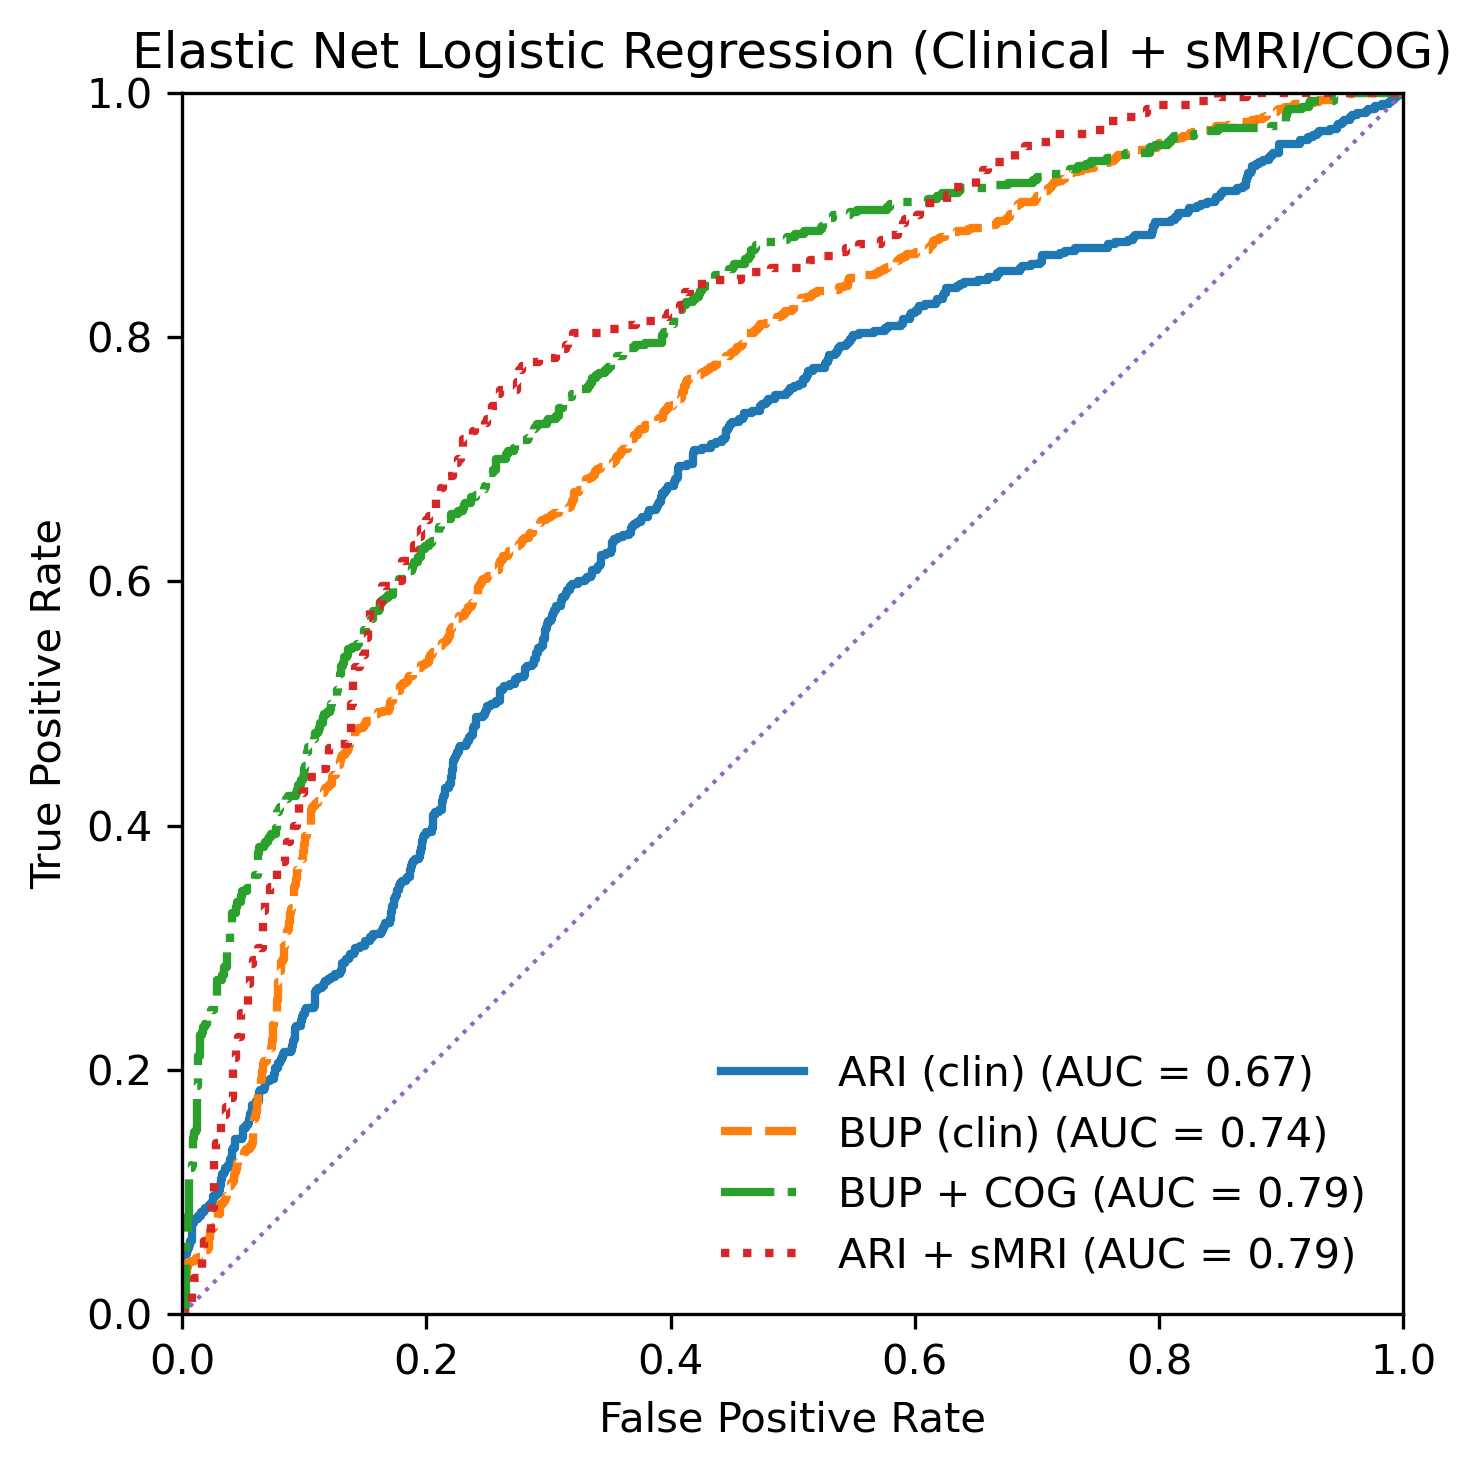

In [4]:

# -------------------------
# Plot – single, publication-ready figure
# -------------------------
plt.figure(figsize=(6, 5), dpi=300)

for label, fpr, tpr, auc_val, style in curves:
    plt.plot(fpr, tpr, linestyle=style, linewidth=2, label=f"{label} (AUC = {auc_val:.2f})")

# chance line
plt.plot([0, 1], [0, 1], linestyle=':', linewidth=1)

# cosmetics
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Elastic Net Logistic Regression (Clinical + sMRI/COG)')
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()


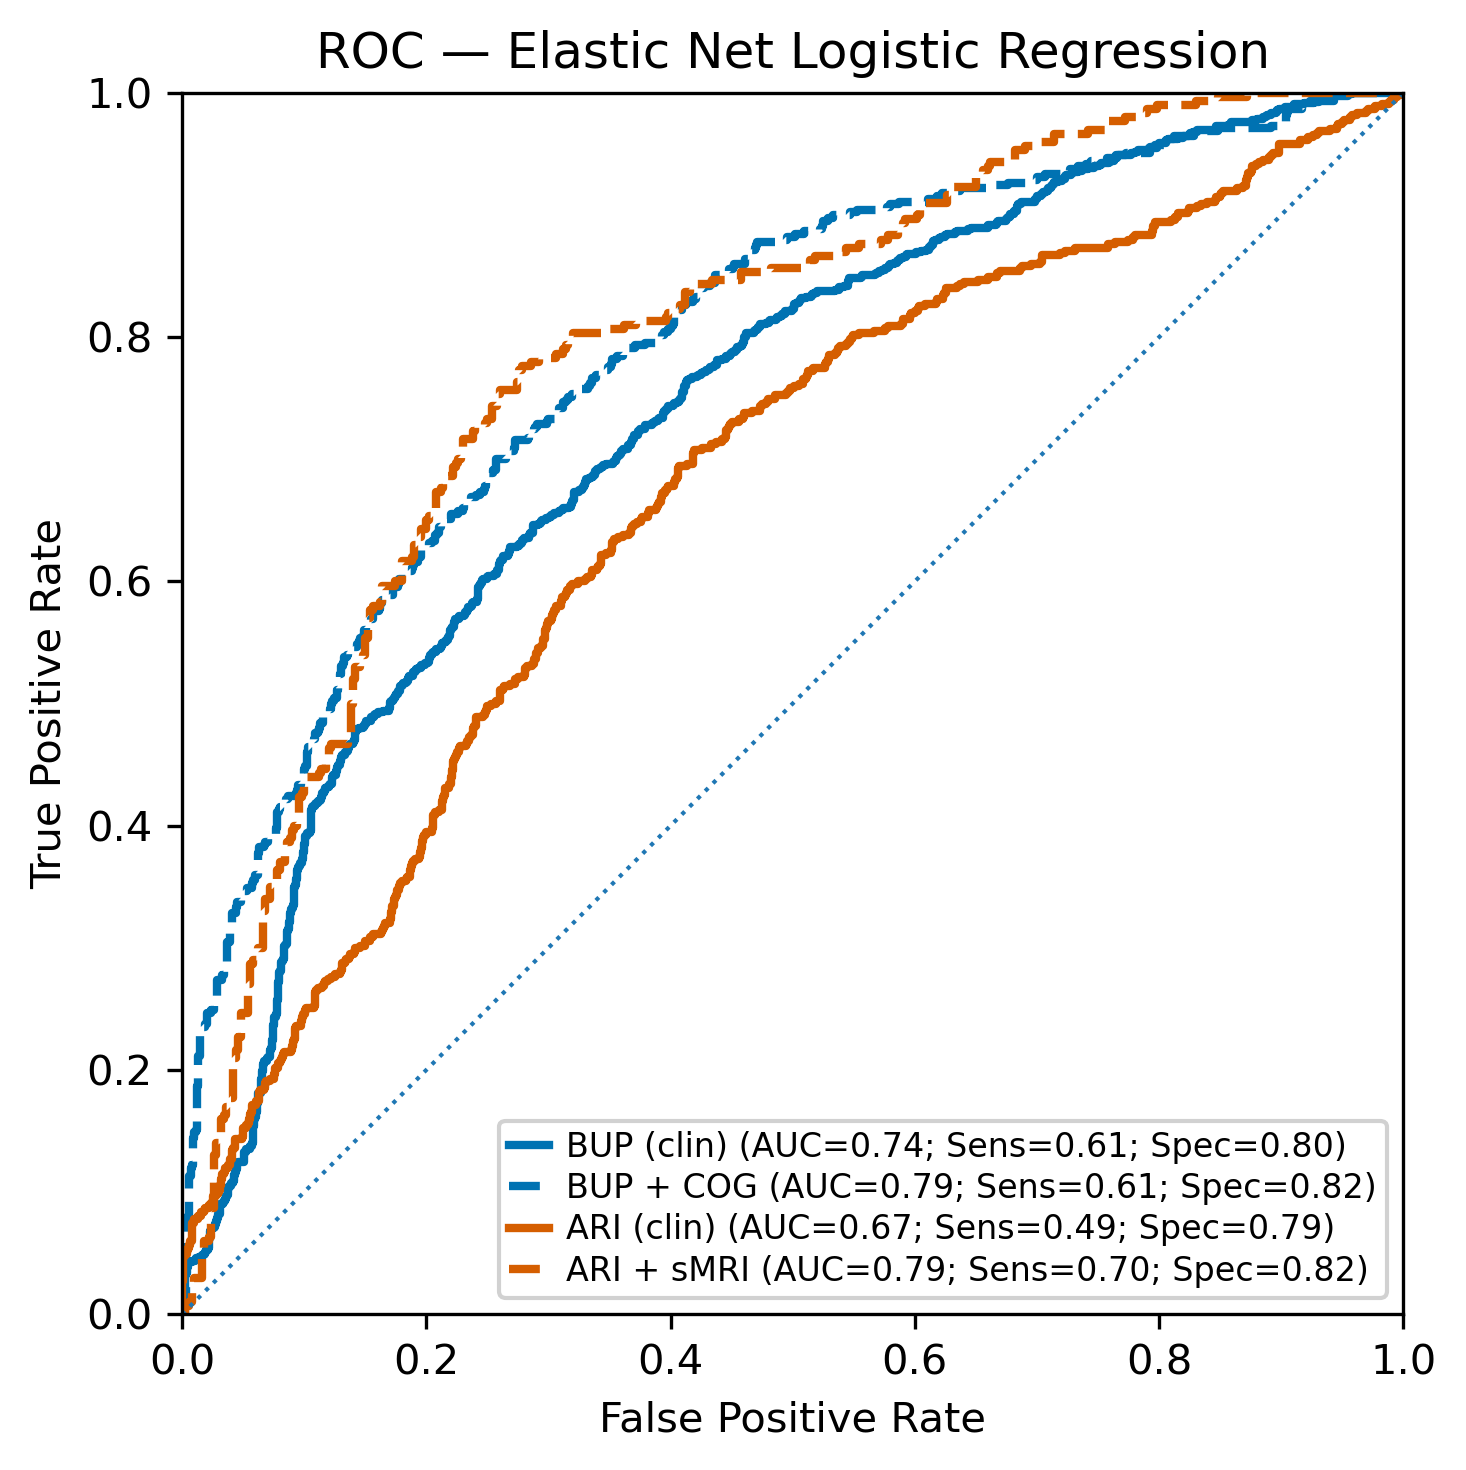

In [6]:
# Sensitivity/Specificity to include in legend (from your CV results)
# Keys match the SHORT labels in `order`
metrics_by_short = {
    'ARI (clin)':     (0.485714286, 0.787234043),
    'BUP (clin)':     (0.614035088, 0.802325581),
    'ARI + sMRI':    (0.703703704, 0.818181818),
    'BUP + COG': (0.609756098,      0.815533981
),
}

# Colors (BUP = blue, ARI = orange) and linestyles (clin solid, modal dashed)
COL_BUP = '#0072B2'
COL_ARI = '#D55E00'
STYLE = {
    'BUP (clin)':     dict(color=COL_BUP, linestyle='-',  linewidth=2),
    'BUP + COG': dict(color=COL_BUP, linestyle='--', linewidth=2),
    'ARI (clin)':     dict(color=COL_ARI, linestyle='-',  linewidth=2),
    'ARI + sMRI':    dict(color=COL_ARI, linestyle='--', linewidth=2),
}

# Desired plotting order and short labels
order = [
    ('BUP (clin)',  'BUP (clin)'),
    ('BUP + COG',   'BUP + COG'),
    ('ARI (clin)',  'ARI (clin)'),
    ('ARI + sMRI',  'ARI + sMRI'),
]

# Index the already-computed ROC curves
curve_by_label = {lbl: (fpr, tpr, auc_val, style) for (lbl, fpr, tpr, auc_val, style) in curves}

plt.figure(figsize=(6, 5), dpi=300)

for orig_label, short_label in order:
    fpr, tpr, auc_val, _ = curve_by_label[orig_label]
    sens, spec = metrics_by_short[short_label]
    plt.plot(
        fpr, tpr,
        label=f"{short_label} (AUC={auc_val:.2f}; Sens={sens:.2f}; Spec={spec:.2f})",
        **STYLE[short_label]
    )

# Chance line
plt.plot([0, 1], [0, 1], linestyle=':', linewidth=1)

# Cosmetics
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC — Elastic Net Logistic Regression')
leg = plt.legend(
    loc='lower right',
    frameon=True,
    fontsize=8,          # smaller text
    labelspacing=0.25,   # vertical spacing between entries
    handlelength=1.2,    # shorter line symbols
    handletextpad=0.5,   # gap between line and text
    borderpad=0.3        # padding inside the legend box
)
leg.get_frame().set_alpha(0.9)   # optional: slight transparency
plt.tight_layout()
# plt.savefig('roc_all_models.png', dpi=600, bbox_inches='tight')
plt.show()


In [15]:

# save high-res
plt.savefig('roc_all_models.png', dpi=600, bbox_inches='tight')
plt.show()


<Figure size 640x480 with 0 Axes>

KeyError: 'ARP (clin)'

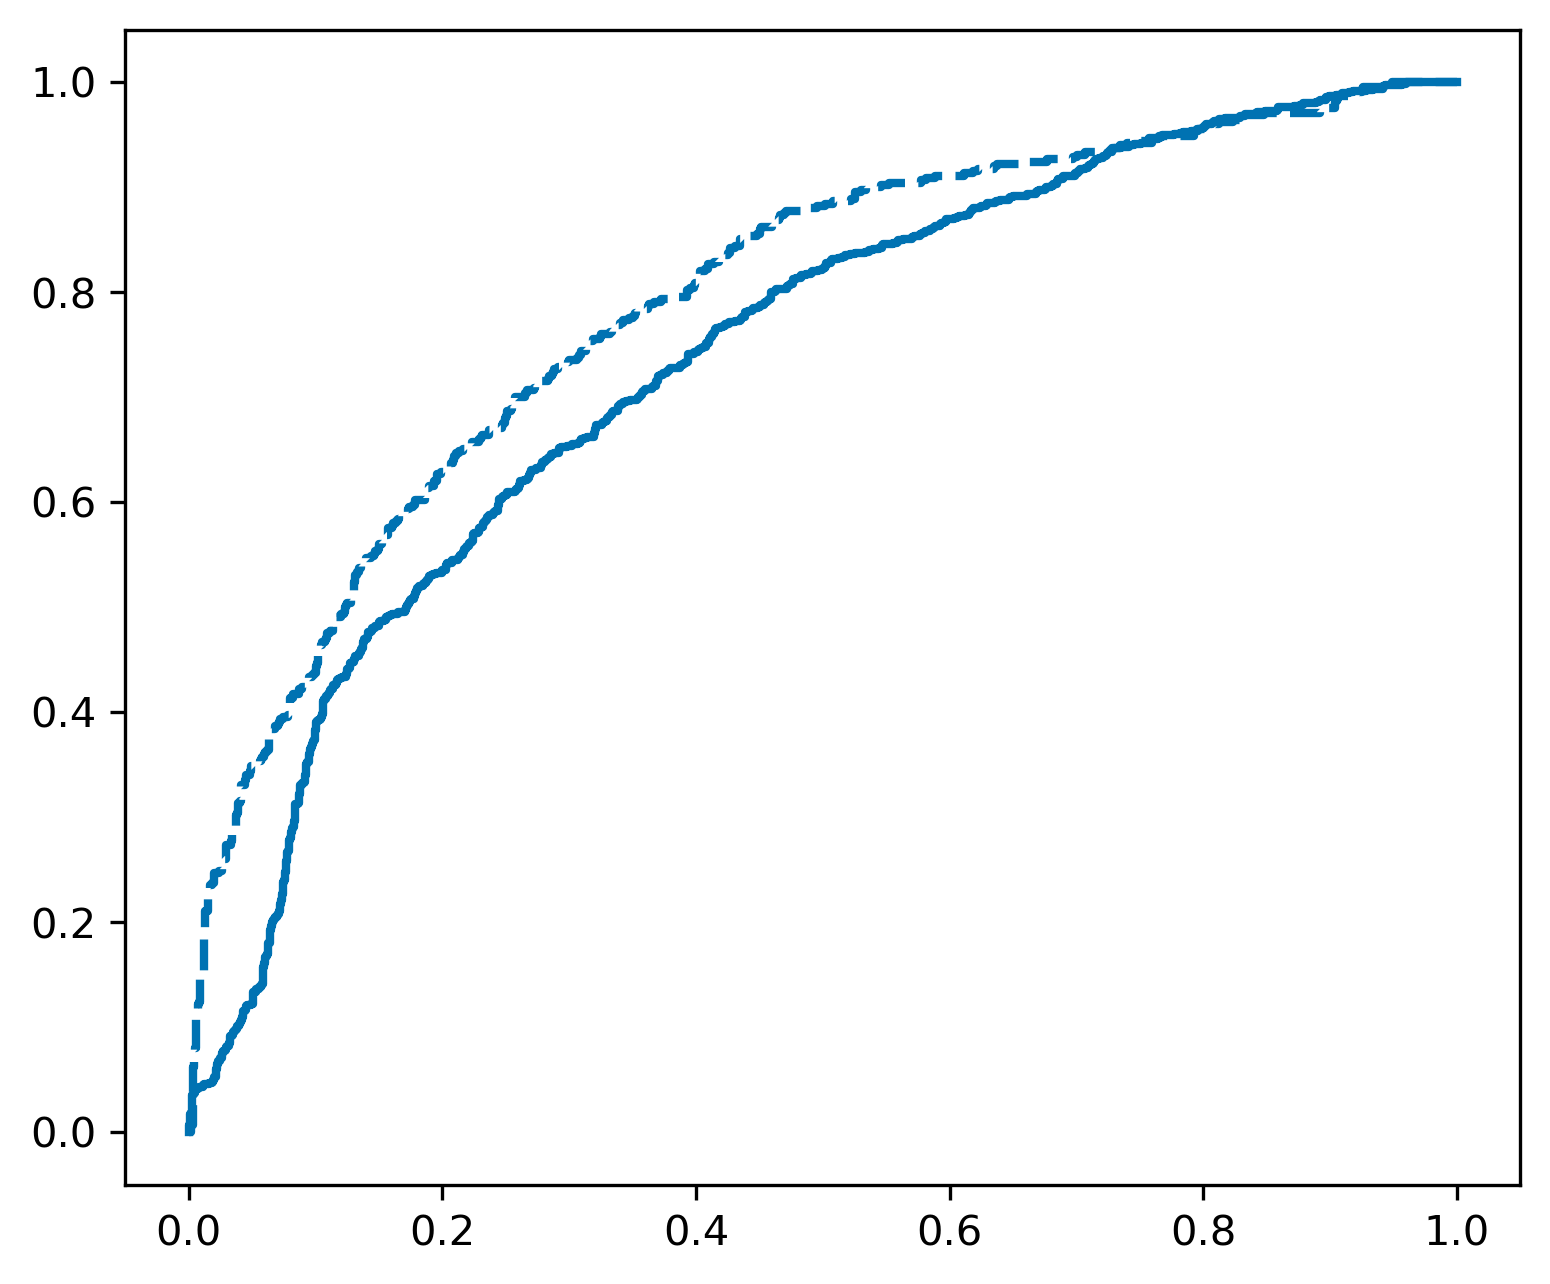

In [18]:
# --- Ordered, color-consistent ROC plot ---
import matplotlib.pyplot as plt

# Map original labels -> desired short labels
order = [
    ('BUP (clin)',  'BUP clin'),
    ('BUP + COG',   'BUP modality'),
    ('ARP (clin)',  'ARI clin'),
    ('ARP + sMRI',  'ARI modality'),
]

# Color/linestyle map (colorblind-friendly)
STYLE = {
    'BUP clin':     dict(color='#0072B2', linestyle='-',  linewidth=2),
    'BUP modality': dict(color='#0072B2', linestyle='--', linewidth=2),
    'ARI clin':     dict(color='#D55E00', linestyle='-',  linewidth=2),
    'ARI modality': dict(color='#D55E00', linestyle='--', linewidth=2),
}

# Index curves by their original labels
curve_by_label = {lbl: (fpr, tpr, auc, ls) for (lbl, fpr, tpr, auc, ls) in curves}

plt.figure(figsize=(6, 5), dpi=300)

for orig_label, short_label in order:
    fpr, tpr, auc_val, _ = curve_by_label[orig_label]
    plt.plot(fpr, tpr, label=f"{short_label} (AUC = {auc_val:.2f})", **STYLE[short_label])

# chance line
plt.plot([0, 1], [0, 1], linestyle=':', linewidth=1)

# cosmetics
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.xlim(0, 1); plt.ylim(0, 1)
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC — Elastic Net Logistic Regression')
plt.legend(loc='lower right', frameon=False)
plt.tight_layout()
# plt.savefig('roc_all_models.png', dpi=600, bbox_inches='tight')
plt.show()
